In [118]:
import pandas as pd
import numpy as np

In [119]:
# VARIABLES DEPENDIENTE DEL ENTORNO
user_code = 'u519914'
data_path = '/us/'+user_code+'/lava_iniciative/data/'

# Rutas de ficheros origen
final_dataframe_csv = data_path + 'result/final_dataframe.csv'
select1_dataframe_csv = data_path + 'result/select1_dataframe.csv'

#Rutas de ficheros de salida 
results = data_path + 'result/'
prediction_csv = results + 'ForestPrediction.csv'
prediction_reg_csv = results + 'ForestRegression.csv'

csv_selectedvariables_allsscc = data_path + 'result/alline_selectedvariables.csv'
prediction_alline_csv = results + 'ForestPrediction_alline.csv'
prediction_reg_alline_csv = results + 'ForestRegression_alline.csv'

In [120]:
from sklearn.ensemble import RandomForestClassifier
# Para generación de gráficas
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
# Funcion para presentar las variables de mayor relevancia
def showNFeaturesByImportance(decisor, X, min_rel=0.01):
    
    importances = decisor.feature_importances_
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")
    count = 0 
    for f in range(X.shape[1]):
        #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print("%d. feature %d:%s (%f)" % (f + 1, indices[f],X.columns[indices[f]], importances[indices[f]]))
        if importances[indices[f]] < min_rel: break
        count += 1
    # Presentamos una gráfica con las features más relevantes
    # Plot the feature importances of the forest
    indices = indices[:count]
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(0,count), importances[indices],
           color="r", align="center")
    plt.xticks(range(0,count), indices)
    plt.xlim([-1, count])
    plt.show()

In [122]:
def assignCategory(value, binValues):
    if value == 0: return 9
    elif value <= binValues[1]: return 0
    elif value > binValues[2]: return 2
    else: return 1

In [123]:
df_alline = pd.read_csv(csv_selectedvariables_allsscc, sep=";", decimal=".")
df_alline.shape

(3470, 100)

In [124]:
y = df_alline['precios']
X = df_alline.drop(['precios','id_sscc','CBD1','CBD2','CBD3'], axis=1)
x_train = X[df_alline['precios']!=0]
y_price = y[df_alline['precios']!=0]
x_unknown = X[df_alline['precios']==0]

In [132]:
x_unknown.shape

(286, 95)

In [126]:
y_levels, bins = pd.qcut(y_price,[0.,0.25,0.75,1],[0,1,2], retbins=True)

In [127]:
clf = RandomForestClassifier(n_estimators=100, max_depth=7)
clf = clf.fit(x_train, y_levels)
train_score = clf.score(x_train, y_levels)
print train_score

0.889133165829


In [133]:
#for i in clf.predict(x_unknown): print i

Feature ranking:
1. feature 35:estudios_tercer_grado_perc (0.086868)
2. feature 94:CBD_min (0.077170)
3. feature 80:es_health_count (0.043029)
4. feature 63:es_hotelservices (0.034261)
5. feature 33:estudios_primer_grado_perc (0.032095)
6. feature 56:es_barsandrestaurants (0.031748)
7. feature 32:sin_estudios_perc (0.031737)
8. feature 34:estudios_segundo_grado_perc (0.027146)
9. feature 89:es_transportation_count (0.023407)
10. feature 66:es_otherservices (0.022764)
11. feature 75:es_barsandrestaurants_count (0.022174)
12. feature 7:2km_hoteles (0.022053)
13. feature 61:es_health (0.021474)
14. feature 92:Tot_op (0.021321)
15. feature 72:es_wellnessandbeauty (0.020108)
16. feature 21:2km_TURISMO (0.017383)
17. feature 82:es_hotelservices_count (0.016520)
18. feature 77:es_contents_count (0.016148)
19. feature 60:es_food (0.013303)
20. feature 58:es_contents (0.012917)
21. feature 93:Tot_fucs (0.012303)
22. feature 90:es_travel_count (0.012178)
23. feature 85:es_otherservices_count (0.

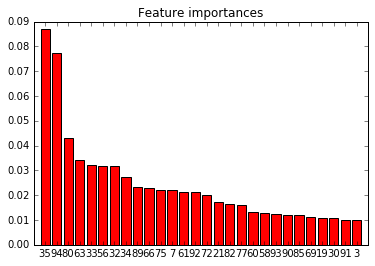

In [129]:
showNFeaturesByImportance(clf, x_train, 0.01)

In [130]:
df_csv = df_alline
df_csv['nivel_precio'] = df_csv['precios'].apply(lambda x: assignCategory(x, bins))
df_csv['nivel_predicho'] = clf.predict(X)
df_csv['acierto'] = df_csv['nivel_precio'] == df_csv['nivel_predicho']
#df_csv['id_sscc'] = df_csv['id_sscc'].apply(lambda x: "%010d" % + x)

In [137]:
print df_csv[df_csv['acierto']==True].shape[0]
print df_csv[df_csv['acierto']!=True].shape[0]

2831
639


In [139]:
print df_csv.shape
df_csv.to_csv(prediction_alline_csv, sep=";",decimal=".")
print prediction_alline_csv

(3470, 103)
/us/u519914/lava_iniciative/data/result/ForestPrediction_alline.csv


### Regresion

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
reg = RandomForestRegressor(n_estimators=100, max_depth=10)
reg = reg.fit(x_train, y_price)
train_score = reg.score(x_train, y_price)

Feature ranking:
1. feature 35:estudios_tercer_grado_perc (0.571577)
2. feature 94:CBD_min (0.119665)
3. feature 55:es_bank (0.019604)
4. feature 19:2km_CULTURA (0.018412)
5. feature 80:es_health_count (0.015861)
6. feature 89:es_transportation_count (0.014385)
7. feature 54:es_auto (0.013995)
8. feature 56:es_barsandrestaurants (0.009740)
9. feature 29:edad_64_anos_perc (0.008253)
10. feature 46:viviendas_mas_150m2_perc (0.006595)
11. feature 69:es_tech (0.005959)
12. feature 75:es_barsandrestaurants_count (0.005763)
13. feature 4:2km_farmacias (0.005624)
14. feature 28:edad_16anos_perc (0.005367)
15. feature 34:estudios_segundo_grado_perc (0.004872)


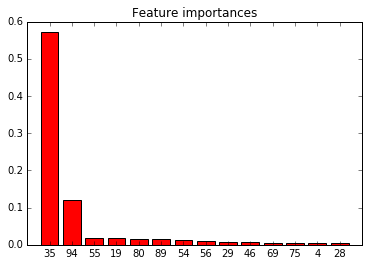

In [149]:
showNFeaturesByImportance(reg, x_train, 0.005)

In [143]:
df_csv = df_alline
df_csv['precio_predicho'] = reg.predict(X)
df_csv['nivel_precio'] = df_csv['precios'].apply(lambda x: assignCategory(x, bins))
df_csv['nivel_predicho'] = df_csv['precio_predicho'].apply(lambda x: assignCategory(x, bins))
df_csv['acierto'] = df_csv['nivel_precio'] == df_csv['nivel_predicho']
df_csv['diferencia'] = df_csv['precio_predicho'] - df_csv['precios']
#df_csv['id_sscc'] = df_csv['id_sscc'].apply(lambda x: "%010d" % + x)

In [144]:
print df_csv.shape
df_csv.to_csv(prediction_reg_alline_csv, sep=";",decimal=".")
print prediction_reg_alline_csv

(3470, 105)
/us/u519914/lava_iniciative/data/result/ForestRegression_alline.csv


In [147]:
print df_csv[df_csv['acierto']].shape
print df_csv[df_csv['acierto']==False].shape

(2841, 105)
(629, 105)


In [59]:
df_csv.head(3)

2km_bibliotecas  2km_bomberos  2km_cines  2km_colegios  2km_farmacias  \
0               11             5         14            69            159   
1               15             4         25            86            209   
2               15             4         26            87            210   

   2km_guarderias  2km_hospitales  2km_hoteles  2km_monumentos  2km_museos  \
0              25               2          130              31          20   
1              26               1          157              36          26   
2              28               1          163              33          37   

         ...          es_travel_count  es_wellnessandbeauty_count     Tot_op  \
0        ...                     90.0                       110.0  1014840.0   
1        ...                    180.0                       281.0  2849939.0   
2        ...                    196.0                       361.0  3516864.0   

   Tot_fucs      CBD_min  precio_predicho  nivel_precio  nivel_predicho  \
0    2086.0  4140.013964                1             2               0   
1    5028.0  3471.624688                1             1               0   
2    6492.0  3506.843533                1             2               0   

   acierto  diferencia_precio  
0    False       -4000.830775  
1    False       -3088.211777  
2    False       -3518.434472  

[3 rows x 101 columns]